In [2]:
import json
import numpy as np
import pandas as pd

### GPT Responses

In [3]:
with open('test_set_full_27_nov.json') as f:
    test_set = json.load(f)

In [8]:
# structuring the format
for art_id in test_set:
    res = test_set[art_id]['response']
    test_set[art_id] = {'content': test_set[art_id]['content'], 'response': {}}
    test_set[art_id]['response']['attributes'] = res[0]
    test_set[art_id]['response']['summaries'] = res[1]

In [9]:
def correct_validity_duration(val):
    val = int(val)
    valid_days = [-1, 1, 3, 7, 14, 30]
    if val in valid_days:
        return val
    else:
        for i in valid_days:
            if val > i:
                valid_value = i
        return valid_value

In [10]:
for art_id in test_set:
    test_set[art_id]['unified_response'] = test_set[art_id]['response']['attributes']
    test_set[art_id]['unified_response']['summary'] = test_set[art_id]['response']['summaries'][0]['denser_summary']
    test_set[art_id]['unified_response']['is_financial_or_business_news'] = True if int(test_set[art_id]['response']['attributes']['is_financial_or_business_news']) == 1 else False if int(test_set[art_id]['response']['attributes']['is_financial_or_business_news']) == 0 else None
    test_set[art_id]['unified_response']['relevant_for_india'] = True if int(test_set[art_id]['response']['attributes']['relevant_for_india']) == 1 else False if int(test_set[art_id]['response']['attributes']['relevant_for_india']) == 0 else None
    test_set[art_id]['unified_response']['article_validity_duration'] = correct_validity_duration(test_set[art_id]['response']['attributes']['article_validity_duration'])

In [12]:
response_list = []
for art_id in test_set:
    cur_res = test_set[art_id]['unified_response']
    cur_tuple = (art_id, cur_res['is_financial_or_business_news'], cur_res['relevant_for_india'], cur_res['article_validity_duration'], cur_res['popularity'], cur_res['article_type'], cur_res['article_sentiment'], cur_res['headline_suggestion'], cur_res['summary'])
    response_list.append(cur_tuple)

In [13]:
response_df = pd.DataFrame(response_list, columns = ['article_id', 'is_financial_or_business_news', 'relevant_for_india', 'article_validity_duration', 'popularity', 'article_type', 'article_sentiment', 'headline_suggestion', 'summary'])

In [15]:
response_df.to_csv('test-set-gpt-responses.csv', index = False)

In [11]:
test_set['65316faa1e5cc42b1b141024']['unified_response']

{'analysis_is_financial_or_business_news': 'This article relates to a change in regulations by the Securities and Exchange Board of India. This affects Indian corporations and investors.',
 'is_financial_or_business_news': True,
 'analysis_of_relevant_for_india': 'The information is highly relevant for Indian entities involved in public listings, as it directly affects the IPO process and timeline.',
 'relevant_for_india': True,
 'analysis_of_article_validity_duration': 'As a significant regulatory change, the article is pertinent for weeks.',
 'article_validity_duration': 14,
 'analysis_of_popularity': 'As this involves markets and IPOs, the article will be moderately popular given the implications on the broader business community.',
 'popularity': 'moderately_popular',
 'analysis_of_article_type': 'The article appears to be factual, presenting an announcement regarding a regulatory change.',
 'article_type': 'fact',
 'analysis_of_article_sentiment': "The sentiment seems neutral as i

In [7]:
test_set['65316faa1e5cc42b1b141024']['response'][0]

{'analysis_is_financial_or_business_news': 'This article relates to a change in regulations by the Securities and Exchange Board of India. This affects Indian corporations and investors.',
 'is_financial_or_business_news': '1',
 'analysis_of_relevant_for_india': 'The information is highly relevant for Indian entities involved in public listings, as it directly affects the IPO process and timeline.',
 'relevant_for_india': '1',
 'analysis_of_article_validity_duration': 'As a significant regulatory change, the article is pertinent for weeks.',
 'article_validity_duration': '14',
 'analysis_of_popularity': 'As this involves markets and IPOs, the article will be moderately popular given the implications on the broader business community.',
 'popularity': 'moderately_popular',
 'analysis_of_article_type': 'The article appears to be factual, presenting an announcement regarding a regulatory change.',
 'article_type': 'fact',
 'analysis_of_article_sentiment': "The sentiment seems neutral as i

### Open Hermes Responses

In [19]:
with open('openhermes-finetuned-responses-test.json', 'rb') as f:
    hermes_test_set = json.load(f)

In [29]:
for cols in ['is_financial_or_business_news', 'relevant_for_india', 'article_validity_duration', 'popularity', 'article_type', 'article_sentiment']:
    print(f'values of {cols} are {set([v[cols] for k, v in hermes_test_set.items()])}')

values of is_financial_or_business_news are {False, True}
values of relevant_for_india are {False, True}
values of article_validity_duration are {1, 3, 7, 14, 30, -1}
values of popularity are {'moderately_popular', 'breaking_news', 'niche'}
values of article_type are {'educational', 'fact', 'opinion', 'fable'}
values of article_sentiment are {'NA', 'bull', 'bear'}


In [30]:
[v for k, v in hermes_test_set.items() if v['article_type'] == 'fable']

[{'analysis_is_financial_or_business_news': 'The article is a fable about a novice trader, discussing trading strategies, risk management and risk taking.',
  'is_financial_or_business_news': True,
  'analysis_of_relevant_for_india': 'The article is about trading, which is universally applicable, hence, relevant for Indians.',
  'relevant_for_india': True,
  'analysis_of_article_validity_duration': 'The article is a fable, and the trading principles discussed are timeless unless there are changes in trading practices.',
  'article_validity_duration': -1,
  'analysis_of_popularity': 'The article is educational and targeted towards novice traders. Hence, it would be niche.',
  'popularity': 'niche',
  'analysis_of_article_type': 'The article is a fable, which is a fictional story with a moral or lesson to learn.',
  'article_type': 'fable',
  'analysis_of_article_sentiment': 'The article is neutral, presenting a story without showing a positive or negative outlook.',
  'article_sentiment

----
Since all the values are already fine (except 1 article with article type), we don't do any correction


---

In [31]:
hermes_response_list = []
for art_id in hermes_test_set:
    cur_res = hermes_test_set[art_id]
    cur_tuple = (art_id, cur_res['is_financial_or_business_news'], cur_res['relevant_for_india'], cur_res['article_validity_duration'], cur_res['popularity'], cur_res['article_type'], cur_res['article_sentiment'], cur_res['headline_suggestion'], cur_res['summary'])
    hermes_response_list.append(cur_tuple)

In [32]:
hermes_response_df = pd.DataFrame(hermes_response_list, columns = ['article_id', 'is_financial_or_business_news', 'relevant_for_india', 'article_validity_duration', 'popularity', 'article_type', 'article_sentiment', 'headline_suggestion', 'summary'])

In [33]:
hermes_response_df.to_csv('test-set-open-hermes-responses.csv', index = False)

### Benchmark

In [4]:
benchmark_df = pd.read_csv('benchmark_responses.csv')

In [5]:
hermes_response_df = pd.read_csv('test-set-open-hermes-responses.csv')
gpt_response_df = pd.read_csv('test-set-gpt-responses.csv')

In [6]:
benchmark_df=benchmark_df[benchmark_df.is_financial_or_business_news.notnull()]

In [29]:
benchmark_df['relevant_for_india'] = benchmark_df['relevant_for_india'].replace('TRUE', True).replace('FALSE', False)

In [13]:
from functools import reduce
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
!pip install matplotlib seaborn scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 10.8 MB/s eta 0:00:0000:0100:01


In [20]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
dtypes = {'relevant_for_india': bool, 'article_validity_duration': int}

In [66]:
benchmark_df = benchmark_df.replace('-', None)

In [61]:
benchmark_df.dtypes

article_id                       object
is_financial_or_business_news      bool
relevant_for_india               object
article_validity_duration        object
popularity                       object
article_type                     object
article_sentiment                object
dtype: object

In [101]:
def get_merged_df(col):
    data_frames = [benchmark_df[['article_id', col]].rename(columns = {col: 'benchmark'}), 
                   hermes_response_df[['article_id', col]].rename(columns = {col: 'descartes'}),
                  gpt_response_df[['article_id', col]].rename(columns = {col: 'gpt4'})]
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['article_id'],
                                            how='inner'), data_frames)
    df_merged = df_merged.dropna()
    if col in dtypes:
        df_merged['benchmark'] = df_merged['benchmark'].astype(dtypes[col])
    return df_merged

#### Is financial

In [99]:
is_financial = get_merged_df('is_financial_or_business_news')

In [102]:
is_financial['descartes_accurate'] = is_financial['benchmark'] == is_financial['descartes']
is_financial['gpt4_accurate'] = is_financial['benchmark'] == is_financial['gpt4']

In [105]:
is_financial[['descartes_accurate', 'gpt4_accurate']].mean() * 100

descartes_accurate    93.333333
gpt4_accurate         93.333333
dtype: float64

In [104]:
is_financial[is_financial.gpt4_accurate == False]

,article_id,benchmark,descartes,gpt4,descartes_accurate,gpt4_accurate
8,651e1a84a662d76276b88aee,False,True,True,False,False
50,6555b5a54b13023f9348be03,False,True,True,False,False
58,651dc6d5a662d76276b7b79b,False,True,True,False,False
68,651e062fa662d76276b85b8e,False,True,True,False,False
72,651df243a662d76276b82b3e,False,True,True,False,False
74,6555c2124b13023f9348d13d,False,False,True,True,False


#### Relevant for India

In [72]:
relevant_for_india = get_merged_df('relevant_for_india')

In [74]:
relevant_for_india['descartes_accurate'] = relevant_for_india['benchmark'] == relevant_for_india['descartes']
relevant_for_india['gpt4_accurate'] = relevant_for_india['benchmark'] == relevant_for_india['gpt4']

In [106]:
relevant_for_india[['descartes_accurate', 'gpt4_accurate']].mean() * 100

descartes_accurate    89.855072
gpt4_accurate         91.304348
dtype: float64

In [124]:
relevant_for_india[relevant_for_india.descartes_accurate == False]

,article_id,benchmark,descartes,gpt4,descartes_accurate,gpt4_accurate
6,6555c1124b13023f9348ce03,True,False,True,False,True
7,6555c5694b13023f9348dcc0,True,False,True,False,True
15,6555cb9f4b13023f9349fa84,True,False,True,False,True
21,6555c3c24b13023f9348d582,True,False,False,False,False
27,6555c31b4b13023f9348d38e,True,False,False,False,False
52,6555cbb74b13023f934a0b16,True,False,True,False,True
87,651dd41ca662d76276b7dca8,True,False,False,False,False


### Validity duration

In [78]:
validity = get_merged_df('article_validity_duration')

In [82]:
validity['log_benchmark'] = validity['benchmark'].apply(lambda x: np.ceil(np.log2(x)) if x > 0 else 10)
validity['log_descartes'] = validity['descartes'].apply(lambda x: np.ceil(np.log2(x)) if x > 0 else 10)
validity['log_gpt4'] = validity['gpt4'].apply(lambda x: np.ceil(np.log2(x)) if x > 0 else 10)

In [84]:
validity['descartes_error'] = validity['log_descartes'] - validity['log_benchmark']
validity['gpt4_error'] = validity['log_gpt4'] - validity['log_benchmark']

In [86]:
validity['descartes_accuracy'] = validity['descartes_error'] == 0.0
validity['gpt4_accuracy'] = validity['gpt4_error'] == 0.0

In [88]:
validity['descartes_partial_accuracy'] = np.abs(validity['descartes_error']) <= 1.0
validity['gpt4_partial_accuracy'] = np.abs(validity['gpt4_error']) <= 0.0

In [107]:
validity[['gpt4_accuracy', 'descartes_accuracy', 'gpt4_partial_accuracy', 'descartes_partial_accuracy']].mean()*100

gpt4_accuracy                 35.593220
descartes_accuracy            30.508475
gpt4_partial_accuracy         35.593220
descartes_partial_accuracy    52.542373
dtype: float64

In [125]:
validity[validity.gpt4_partial_accuracy == False]

,article_id,benchmark,descartes,gpt4,log_benchmark,log_descartes,log_gpt4,descartes_error,gpt4_error,descartes_accuracy,gpt4_accuracy,descartes_partial_accuracy,gpt4_partial_accuracy
3,651de15fa662d76276b7fecf,3,30,-1,2.0,5.0,10.0,3.0,8.0,False,False,False,False
4,651e1b59a662d76276b88cc8,3,30,30,2.0,5.0,5.0,3.0,3.0,False,False,False,False
5,6555cc194b13023f934a4fa1,7,14,14,3.0,4.0,4.0,1.0,1.0,False,False,True,False
6,6555c1124b13023f9348ce03,3,14,-1,2.0,4.0,10.0,2.0,8.0,False,False,False,False
7,6555c5694b13023f9348dcc0,3,30,30,2.0,5.0,5.0,3.0,3.0,False,False,False,False
9,6555cc534b13023f934a7aa8,7,3,14,3.0,2.0,4.0,-1.0,1.0,False,False,True,False
11,6555cb974b13023f9349f4ae,14,-1,-1,4.0,10.0,10.0,6.0,6.0,False,False,False,False
12,6555cc4c4b13023f934a75cf,7,14,14,3.0,4.0,4.0,1.0,1.0,False,False,True,False
13,6555ccc94b13023f934ad203,14,30,-1,4.0,5.0,10.0,1.0,6.0,False,False,True,False
15,6555cb9f4b13023f9349fa84,30,30,14,5.0,5.0,4.0,0.0,-1.0,True,False,True,False


#### Popularity

In [108]:
popularity = get_merged_df('popularity')

In [119]:
popularity['descartes_accuracy'] = popularity['descartes'] == popularity['benchmark']
popularity['gpt4_accuracy'] = popularity['gpt4'] == popularity['benchmark']

In [121]:
popularity[['descartes_accuracy', 'gpt4_accuracy']].mean() * 100

descartes_accuracy    55.932203
gpt4_accuracy         59.322034
dtype: float64

In [115]:
pd.pivot_table(popularity[['benchmark', 'descartes', 'article_id']], index = 'benchmark', columns = 'descartes', aggfunc='count')

article_id                         
descartes          breaking_news moderately_popular niche
benchmark                                                
breaking_news                1.0                4.0   NaN
moderately_popular           7.0               26.0   9.0
niche                        1.0                5.0   6.0

In [117]:
pd.pivot_table(popularity[popularity.gpt4 != 'moderate_popularity'][['benchmark', 'gpt4', 'article_id']], index = 'benchmark', columns = 'gpt4', aggfunc='count')

article_id                         
gpt4               breaking_news moderately_popular niche
benchmark                                                
breaking_news                2.0                2.0   1.0
moderately_popular           5.0               28.0   8.0
niche                        NaN                7.0   5.0

In [126]:
popularity.groupby('descartes')['descartes'].count()

descartes
breaking_news          9
moderately_popular    35
niche                 15
Name: descartes, dtype: int64

In [127]:
popularity.groupby('gpt4')['gpt4'].count()

gpt4
breaking_news           7
moderate_popularity     1
moderately_popular     37
niche                  14
Name: gpt4, dtype: int64

In [128]:
popularity.groupby('benchmark')['benchmark'].count()

benchmark
breaking_news          5
moderately_popular    42
niche                 12
Name: benchmark, dtype: int64

In [118]:
len(popularity)

59

In [111]:
popularity.groupby('benchmark')['descartes'].count()

benchmark
breaking_news          5
moderately_popular    42
niche                 12
Name: descartes, dtype: int64

In [91]:
validity['gpt4_partial_accuracy'].mean()

0.3559322033898305

In [92]:
validity['descartes_accuracy'].mean()

0.3050847457627119

In [93]:
validity['gpt4_accuracy'].mean()

0.3559322033898305

In [95]:
validity[validity.gpt4_accuracy == False]

,article_id,benchmark,descartes,gpt4,log_benchmark,log_descartes,log_gpt4,descartes_error,gpt4_error,descartes_accuracy,gpt4_accuracy,descartes_partial_accuracy,gpt4_partial_accuracy
3,651de15fa662d76276b7fecf,3,30,-1,2.0,5.0,10.0,3.0,8.0,False,False,False,False
4,651e1b59a662d76276b88cc8,3,30,30,2.0,5.0,5.0,3.0,3.0,False,False,False,False
5,6555cc194b13023f934a4fa1,7,14,14,3.0,4.0,4.0,1.0,1.0,False,False,True,False
6,6555c1124b13023f9348ce03,3,14,-1,2.0,4.0,10.0,2.0,8.0,False,False,False,False
7,6555c5694b13023f9348dcc0,3,30,30,2.0,5.0,5.0,3.0,3.0,False,False,False,False
9,6555cc534b13023f934a7aa8,7,3,14,3.0,2.0,4.0,-1.0,1.0,False,False,True,False
11,6555cb974b13023f9349f4ae,14,-1,-1,4.0,10.0,10.0,6.0,6.0,False,False,False,False
12,6555cc4c4b13023f934a75cf,7,14,14,3.0,4.0,4.0,1.0,1.0,False,False,True,False
13,6555ccc94b13023f934ad203,14,30,-1,4.0,5.0,10.0,1.0,6.0,False,False,True,False
15,6555cb9f4b13023f9349fa84,30,30,14,5.0,5.0,4.0,0.0,-1.0,True,False,True,False


In [68]:
def plot_confusion_matrix(col):
    df = get_merged_df(col)
    cmaps = {'descartes': 'Greens','gpt4': 'Blues'}
    for col in ['descartes', 'gpt4']:
        conf_matrix = confusion_matrix(df['benchmark'], df[col])
        return conf_matrix
        # Normalize the confusion matrix to get percentages
        conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Create a pandas DataFrame from the matrix for easier plotting
        conf_matrix_df = pd.DataFrame(conf_matrix_normalized, 
                                      index=['Actual: False', 'Actual: True'], 
                                      columns=['Predicted: False', 'Predicted: True'])

        # Plotting
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_df, annot=True, fmt=".2%",cmap=cmaps[col])
        plt.title(f'Confusion Matrix for {col}')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

In [70]:
np.sum(plot_confusion_matrix('article_validity_duration'))

59

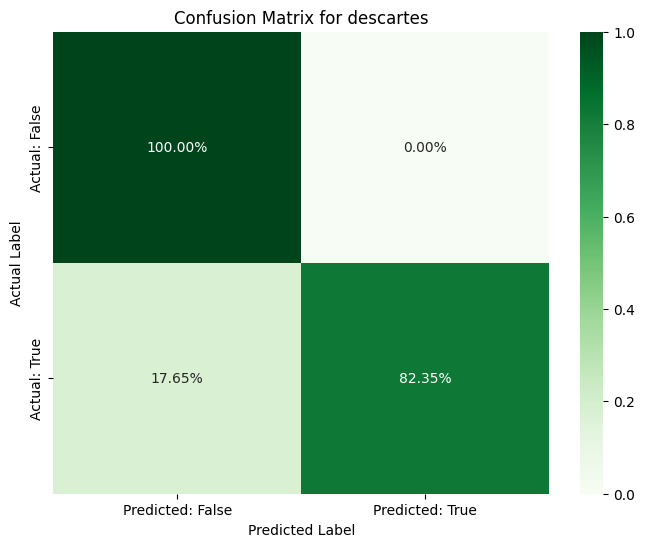

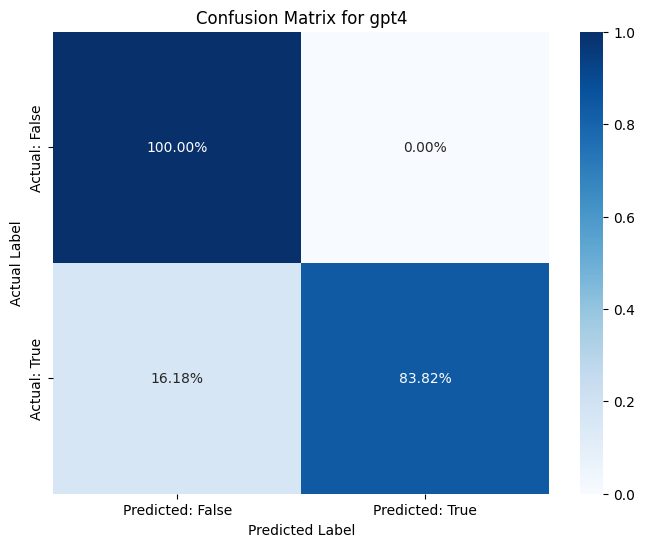

In [55]:
plot_confusion_matrix('relevant_for_india')

In [30]:
confusion_matrix(is_fin['benchmark'], is_fin['descartes'])

array([[16,  6],
       [ 0, 68]])

In [31]:
confusion_matrix(is_fin['benchmark'], is_fin['gpt4'])

array([[16,  6],
       [ 0, 68]])

In [ ]:
def get_

In [29]:
is_fin = get_merged_df('is_financial_or_business_news')

In [ ]:
is_fin = get_merged_df('is_financial_or_business_news')

In [ ]:
relevance_df = pd.merge(benchmark_df[['article_id', 'relevant_for_india']].rename(columns = {'relevant_for_india': 'benchmark'}))

In [57]:
benchmark_df.dtypes

article_id                       object
is_financial_or_business_news      bool
relevant_for_india               object
article_validity_duration        object
popularity                       object
article_type                     object
article_sentiment                object
dtype: object

In [20]:
benchmark_df.article_validity_duration

0      14
1       1
2       -
3       3
4       3
     ... 
95     30
96     30
97     30
98    NaN
99      1
Name: article_validity_duration, Length: 100, dtype: object